In [1]:
import numpy as np
import scipy.linalg as spla
import scipy.fftpack as fp
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

np.random.seed(42)

In [2]:
## Parameters

# network parameters
n_agents = 4 # number of agents
n_clust_1 = 2 # number of agents in the 1st cluster
n_clust_2 = n_agents - n_clust_1 # number of agents in the 2nd cluster
big_a = 0.08 # A parameter in mu and nu evaluation
mu = (1. + big_a) / 2
nu = (1. - big_a) / 2
w_disp = 1. * 1e-3 # w dispersion
alpha = np.pi / 2 - .02 # alpha phase lag

# simulation parameters
dt = 1 # time step (sample spacing)
sim_time = 200000. # sumulation time (in seconds)
n_it = int(sim_time / dt)
print(n_it)

200000


In [3]:
## Init vals

w_nat = np.random.standard_cauchy(n_agents) * w_disp
theta_0 = 2 * np.pi * np.random.rand(n_agents)    # theta
print(w_nat)
print(theta_0)

[-0.0035925   0.00042526  0.00100007  0.00205778]
[0.12933619 6.09412333 5.23039137 1.33416598]


In [4]:
## Progress recording

thetas = np.zeros((n_agents, n_it))
thetas_dot = np.zeros_like(thetas)
time_vals = np.linspace(0., sim_time, n_it)

In [5]:
## Build the matrix of coefficients

coef_mat = np.full((n_agents, n_agents), mu, dtype=np.float32)
coef_mat[:n_clust_1, :n_clust_1] = nu 
coef_mat[n_clust_1:, n_clust_1:] = nu
coef_mat[:, :n_clust_1] = coef_mat[:, :n_clust_1] / n_clust_1
coef_mat[:, n_clust_1:] = coef_mat[:, n_clust_1:] / n_clust_2

In [6]:
## Start loop

theta = theta_0
for i in range(n_it):
    thetas[:, i] = theta 
    
    # sum of sins
    theta_mat = np.repeat(theta.reshape(n_agents, 1), n_agents, axis=1)
    diffs = theta_mat.T - theta_mat
    diffs = diffs + alpha
    sins = np.sin(diffs)
    sins_mul = np.multiply(coef_mat, sins) 
    sums_sins = np.sum(sins_mul, axis=1)
    
    # truing different time-varying w_nat
    #w_nat_tv = w_nat * np.sin(5 * 1e-3 * i * 2 * np.pi / (1 / dt))
    
    theta_new = theta + dt * (w_nat + sums_sins)
    thetas_dot[:, i] = np.divide(theta_new - theta, dt)
    theta = theta_new 

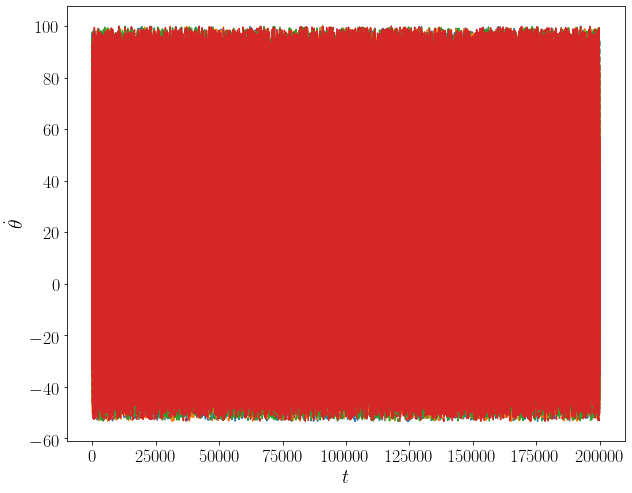

In [7]:
## Plot theta dot

plt.figure(figsize=(10, 8))
for i in range(n_agents):
    plt.plot(time_vals, thetas_dot[i], '--')
plt.xlabel(r'$t$', fontsize=20)
plt.ylabel(r'$\dot{\theta}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [8]:
## Check convergence const

true_mean = np.mean(thetas_dot[:, 0])
conver_mean = thetas_dot[0, -1]
print(true_mean)
print(conver_mean)

44.99183182157862
42.591751798056066


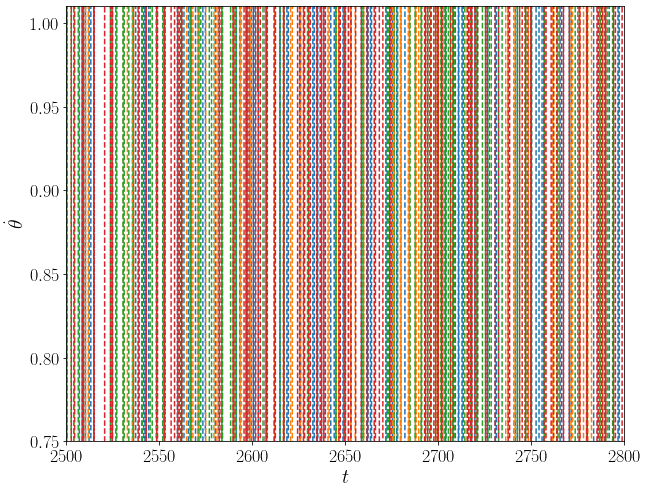

In [9]:
## Closer look...

plt.figure(figsize=(10, 8))
for i in range(n_agents):
    plt.plot(time_vals, thetas_dot[i], '--')
plt.xlabel(r'$t$', fontsize=20)
plt.ylabel(r'$\dot{\theta}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim((2500, 2800))
plt.ylim((0.75, 1.01))
plt.show()